In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from math import copysign

In [91]:
## All the funcions:

# EMA formula
def EMA(N, start_index, values):
    if (start_index >= len(values)):
        raise Exception("Index out of bounds!")
    

    multiplier = 0
    divisor = 0
    power = 0
    smoothing = 2 / (N + 1) # Smoothing factor, used in EMA function

    # We iterate over N elements in a reversed direction
    for index in range(start_index, start_index - N, -1):
        if (index < 0):
            break

        multiplier += values[index] * smoothing**power
        divisor += smoothing**power
        power += 1

    return (multiplier/divisor)

# EMA values list for n last elements
def EMA_values(N, n_elements, values):
    size = len(values)

    ema_values = []

    if n_elements > size:
        raise Exception("List length is smaller than number of elements!")
    
    start_index = size - n_elements

    #calculate ema for each element in the "scope"
    for index in range(start_index, size):
        ema_values.append(EMA(N, index, values))

    return ema_values

# MACD = EMA12 - EMA26
def MACD_values(n_elements, values):
    size = len(values)

    macd_values = []

    if n_elements > size:
        raise Exception("List length is smaller than number of elements!")

    ema12_values = EMA_values(12, n_elements, values)
    ema26_values = EMA_values(26, n_elements, values)

    #calculate ema difference for each element in the "scope"
    for index in range(0, n_elements):
        macd_values.append(ema12_values[index] - ema26_values[index])

    return macd_values

# Signal = EMA9 of the MACD values!
def Signal_values(n_elements, macd_values):
    return EMA_values(9, n_elements, macd_values)


# Plot formulas:

# Macd-signal difference
def plot_macd_signal_difference(x_analyzed, macd_signal_difference):
    # Create colors based on the sign of each value:
    colors = ['green' if val >= 0 else 'red' for val in macd_signal_difference]

    # Create the bar plot:
    plt.figure(figsize=(12, 6))
    plt.bar(x_analyzed, macd_signal_difference, color=colors)


    plt.title('MACD - Signal')

def plot_price_history(x_analyzed, values):
    plt.figure(figsize=(12, 6))

    plt.plot(x_analyzed, values[x_analyzed[0]:x_analyzed[-1] + 1], label="Price")

    plt.xlabel('Record Index')
    plt.ylabel('Close price')
    plt.title('Price history')

    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

    plt.legend()

def plot_transaction_on_price(x_analyzed, price_values, transactions, markersize=5):
    plt.figure(figsize=(12, 6))

    plot_price_history(x_analyzed, price_values)

    # Get indexes where actions occur
    buy_indexes = np.where(transactions == 1)[0] + x_analyzed[0]
    sell_indexes = np.where(transactions == 2)[0] + x_analyzed[0]

    # For display, assign a y-value for markers. Here we use y=1 for buys and y=-1 for sells.
    y_buy = [price_values[i] for i in buy_indexes]
    y_sell = [price_values[i] for i in sell_indexes]

    # Create the plot
    plt.plot(buy_indexes, y_buy, 'g^', markersize=markersize, label='Buy')  # green upward triangles for buy
    plt.plot(sell_indexes, y_sell, 'rv', markersize=markersize, label='Sell')  # red downward triangles for sell
    plt.legend()

    return buy_indexes, sell_indexes

def plot_profits(delta_procents):
    colors = ['green' if val >= 0 else 'red' for val in delta_procents]

    # Create the bar plot:
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(0, len(delta_procents)),delta_procents, color=colors)


    plt.title('Profits')
    plt.ylabel("Procent earned")

def plot_capital_history(records_indexes, capital_history):
    plt.figure(figsize=(12, 6))

    plt.title("Capital history")

    plt.ylabel("Number of units")
    plt.xlabel("Record index")

    plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)

    plt.plot(records_indexes, capital_history, label="Capital value", color="green")
    plt.legend()

def plot_combined_history(x_analyzed, price_values, records_indexes, capital_history, usd_history, lazy):
    fig, (price_plt, capital_plt, usd_plt) = plt.subplots(3, figsize=(18,12))
    fig.suptitle('Combined history')

    price_plt.plot(x_analyzed, price_values[-len(x_analyzed):], marker='.', color='blue')
    price_plt.set_title('SOL Price history')
    price_plt.set(ylabel='Price per SOL unit')
    price_plt.grid()

    capital_plt.plot(records_indexes, capital_history, marker='.', color='green')
    capital_plt.set_title('SOL Capital history')
    capital_plt.set(ylabel='Number of SOL units')
    capital_plt.grid()

    usd_plt.plot(records_indexes, usd_history, marker='.', color='orange', label='MACD trading')
    usd_plt.plot(records_indexes, lazy, marker='.', color='gray', label='Lazy trading')
    usd_plt.set_title('USD Capital history')
    usd_plt.set(xlabel='Record index', ylabel='Number of USD')
    usd_plt.grid()
    usd_plt.legend()

<bound method DataFrame.info of             time     Open     High      Low    Close      Volume
0     2021-01-01    1.510    1.865    1.495    1.847  1125773.54
1     2021-01-02    1.847    2.012    1.752    1.799  1060347.35
2     2021-01-03    1.799    2.808    2.007    2.185  1475936.63
3     2021-01-04    2.185    2.573    2.066    2.491  1543191.05
4     2021-01-05    2.491    2.634    2.145    2.158  1246011.66
...          ...      ...      ...      ...      ...         ...
1363  2024-09-25  152.720  153.880  147.300  147.970  1140072.57
1364  2024-09-26  147.970  158.030  146.590  155.580  1590861.37
1365  2024-09-27  155.580  161.240  154.010  157.640  1503547.66
1366  2024-09-28  157.640  159.400  155.080  156.780   576303.31
1367  2024-09-29  156.780  160.770  155.120  160.010   741062.22

[1368 rows x 6 columns]>


<Figure size 1200x600 with 0 Axes>

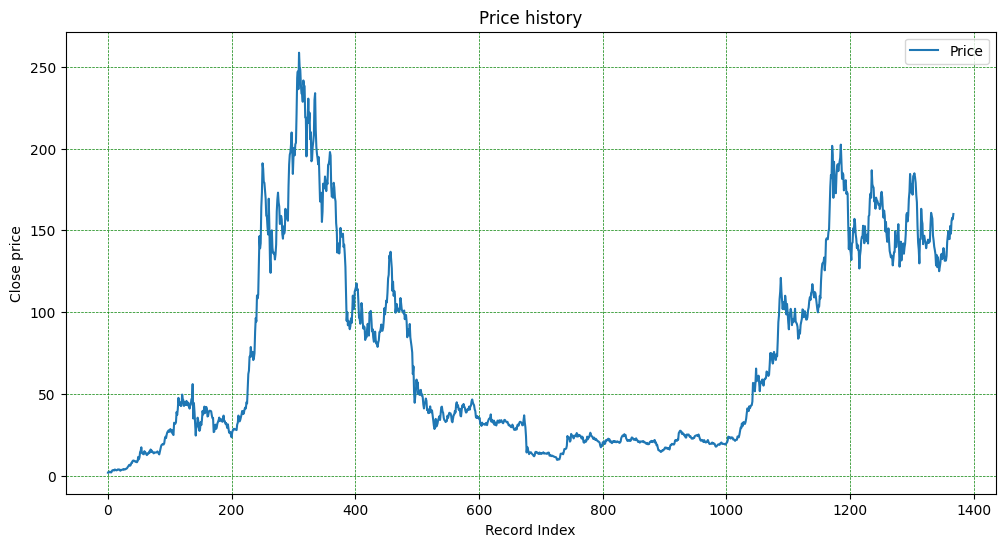

In [92]:
## Main data import and variables creation

data_frame = pd.read_csv("Solana_daily_data_2021_2024.csv")
print(data_frame.info)

close_data = data_frame.get("Close").tolist()   # Price and the end of the day
time_data = data_frame.get("time").tolist()     # Corresponding days

analyzed_from = 60
analyzed_to = 1060

n_records = len(close_data)
n_records_analyzed = analyzed_to - analyzed_from

x_full = list(np.arange(n_records))
x_analyzed = list(np.arange(analyzed_from, analyzed_to))


plt.figure(figsize=(12, 6))

plot_price_history(x_full, close_data)

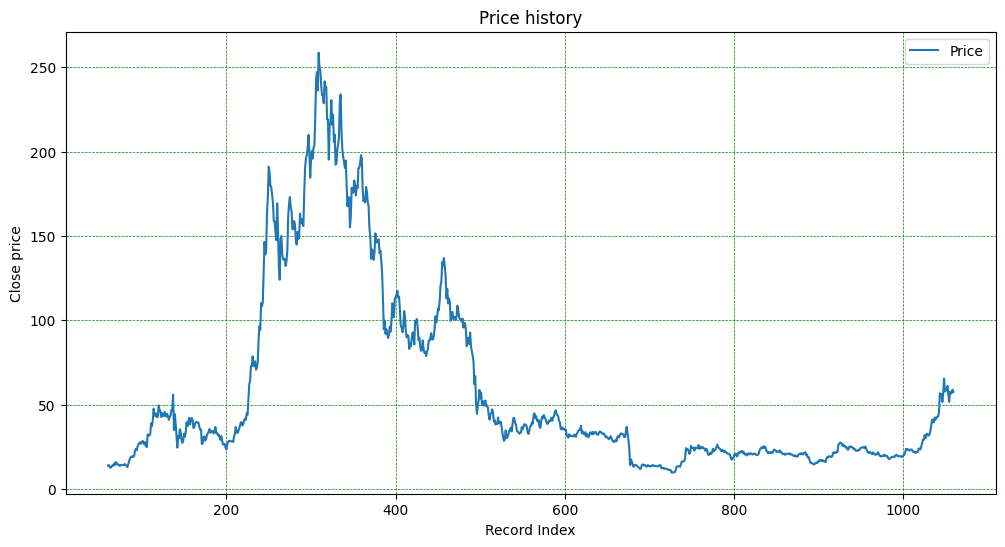

In [93]:
plot_price_history(x_analyzed, close_data)

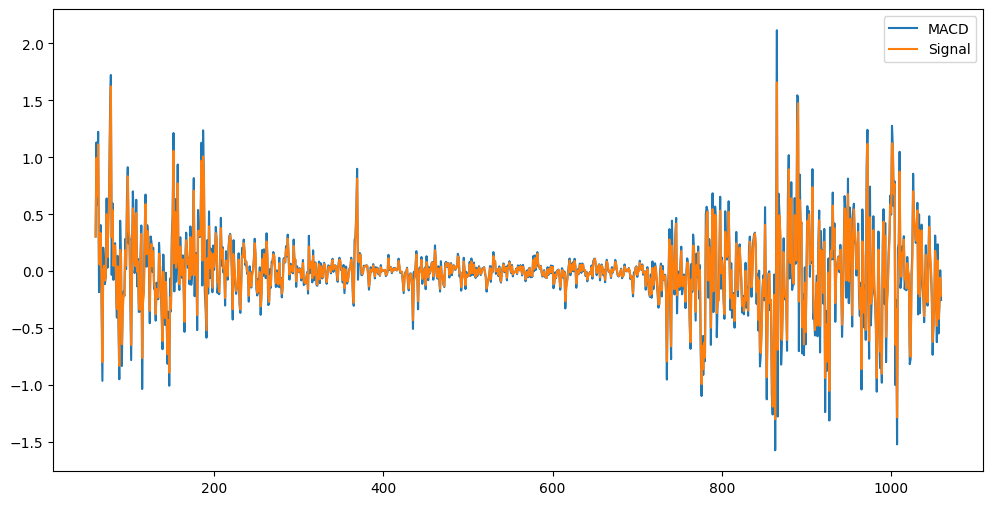

In [94]:
macd_values = MACD_values(n_records_analyzed, close_data)
signal_values = Signal_values(n_records_analyzed, macd_values)

plt.figure(figsize=(12, 6))
plt.plot(x_analyzed, macd_values, label="MACD")
plt.plot(x_analyzed, signal_values, label="Signal")
plt.legend()
plt.show()


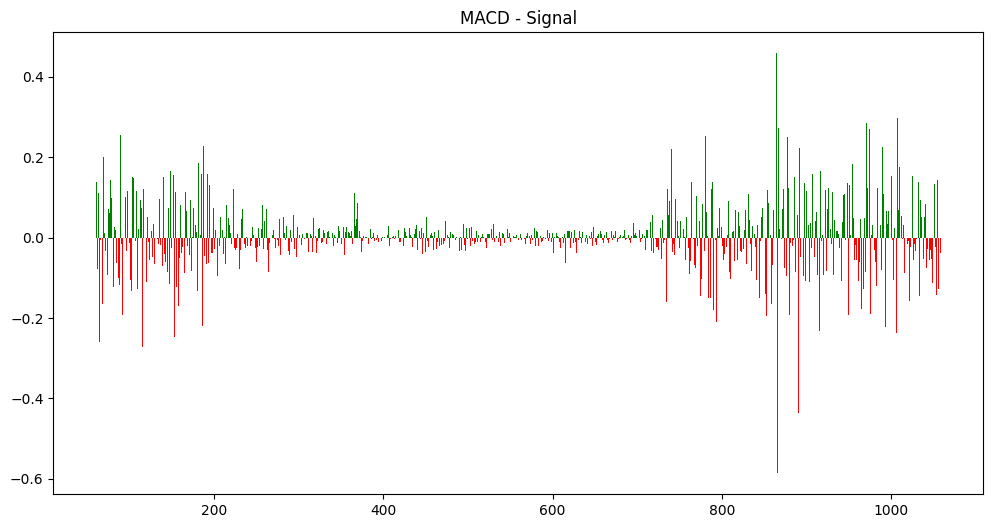

In [95]:
# For transaction decision me are interested in MACD Signal difference 
macd_signal_difference = np.subtract(macd_values, signal_values)

plot_macd_signal_difference(x_analyzed, macd_signal_difference)

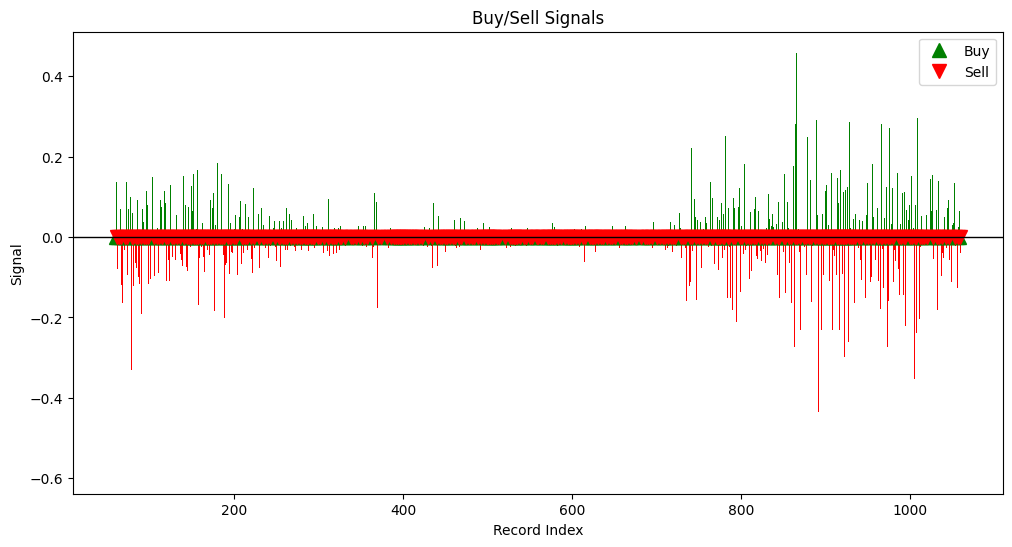

In [96]:
# 0 - nothing, 1 - buy, 2 - sell
transactions = np.zeros(n_records_analyzed)
transactions[0] = 1
# 1 - keep, -1 - sell
current_state = 1

## TODO: iterate through 
for index in range(1, n_records_analyzed + 1):
    if copysign(1, macd_signal_difference[index - 1]) != current_state: # if the sign was changed
        if current_state == 1:
            current_state = -1
            transactions[index - 1] = 2 # sell
        else:
            current_state = 1
            transactions[index - 1] = 1 # buy

plot_macd_signal_difference(x_analyzed, macd_signal_difference)

# Get indexes where actions occur
buy_indexes = np.where(transactions == 1)[0] + x_analyzed[0]
sell_indexes = np.where(transactions == 2)[0] + x_analyzed[0]

# For display, assign a y-value for markers. Here we use y=1 for buys and y=-1 for sells.
y_buy = np.zeros_like(buy_indexes)
y_sell = np.zeros_like(sell_indexes)

# Create the plot
plt.plot(buy_indexes, y_buy, 'g^', markersize=10, label='Buy')  # green upward triangles for buy
plt.plot(sell_indexes, y_sell, 'rv', markersize=10, label='Sell')  # red downward triangles for sell

# Draw a horizontal line at y=0
plt.axhline(0, color='black', linewidth=1)

plt.xlabel('Record Index')
plt.ylabel('Signal')
plt.title('Buy/Sell Signals')
plt.legend()
plt.show()

In [97]:
print(len(x_analyzed))

1000


<Figure size 1200x600 with 0 Axes>

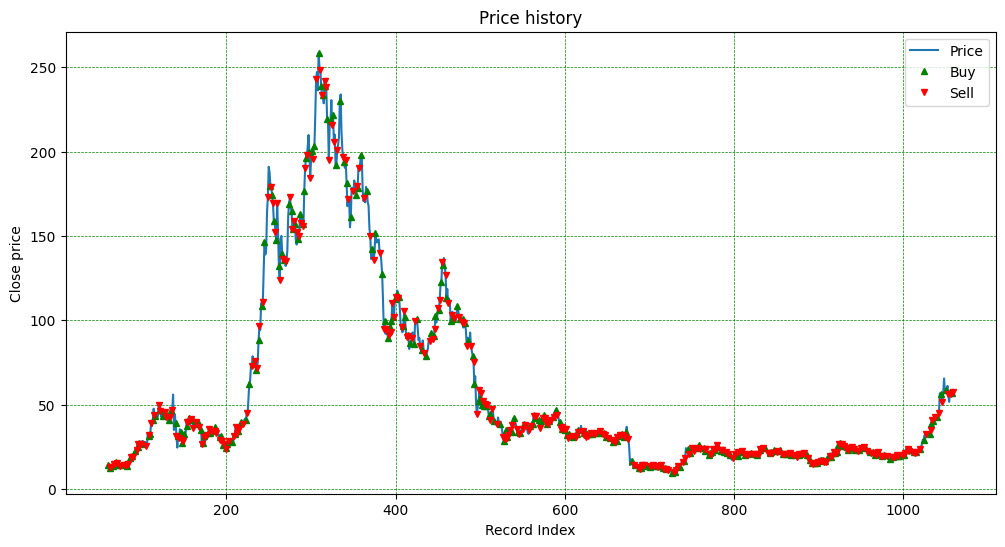

In [98]:
# Now let's plot buy and sell signals on trading history

buy_indexes, sell_indexes = plot_transaction_on_price(x_analyzed, close_data, transactions) 
## TODO: FIX - If x is not x_analyzed, first len(transactions) elements are taken. 


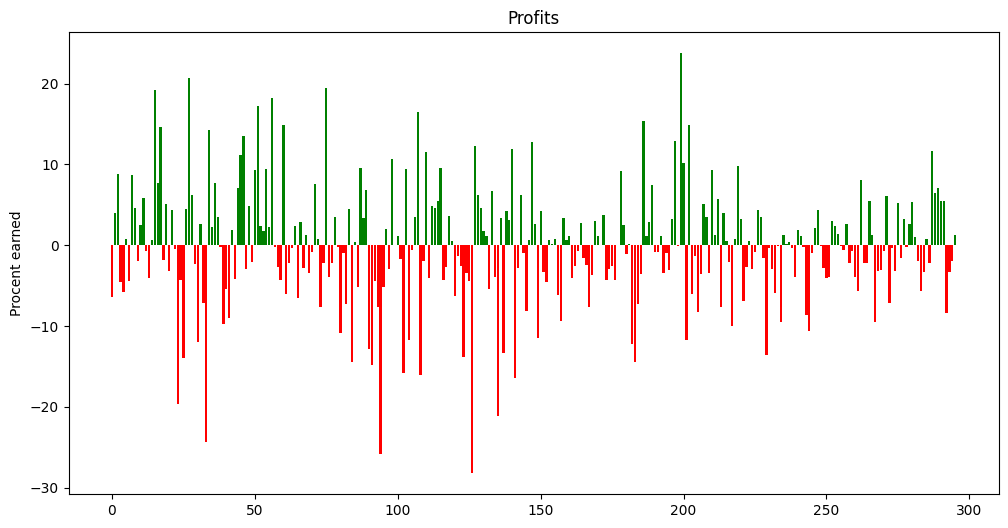

In [99]:
# Next we are going to calculate all the buy-sell transaction couples 
# and see, how many of them gave profit

paired_indexes = zip(buy_indexes, sell_indexes)
profits_value = []
profits_procent = []

for pair in paired_indexes:
    buy_price = close_data[pair[0]]
    sell_price = close_data[pair[1]]
    delta_price = sell_price - buy_price
    profits_value.append(delta_price)
    profits_procent.append(delta_price * 100 / buy_price)


plot_profits(profits_procent) # This is the procent we earned by each pair of transactions

In [100]:
# Simulation

start_capital_USD = 1000.0 # Number of SOL token units at the beggining of our trading history
start_capital_SOL = start_capital_USD / close_data[x_analyzed[0]]

capital = start_capital_SOL
capital_history = [capital]

for procent in profits_procent:
    capital = capital * (1 + procent / 100)
    capital_history.append(capital)

records_indexes = list()
records_indexes.append(int(buy_indexes[0]))
records_indexes = np.hstack((records_indexes, sell_indexes))

usd_history = []

for i in range(0, len(records_indexes)):
    usd_history.append(capital_history[i] * close_data[records_indexes[i]]) # number of units * unit price

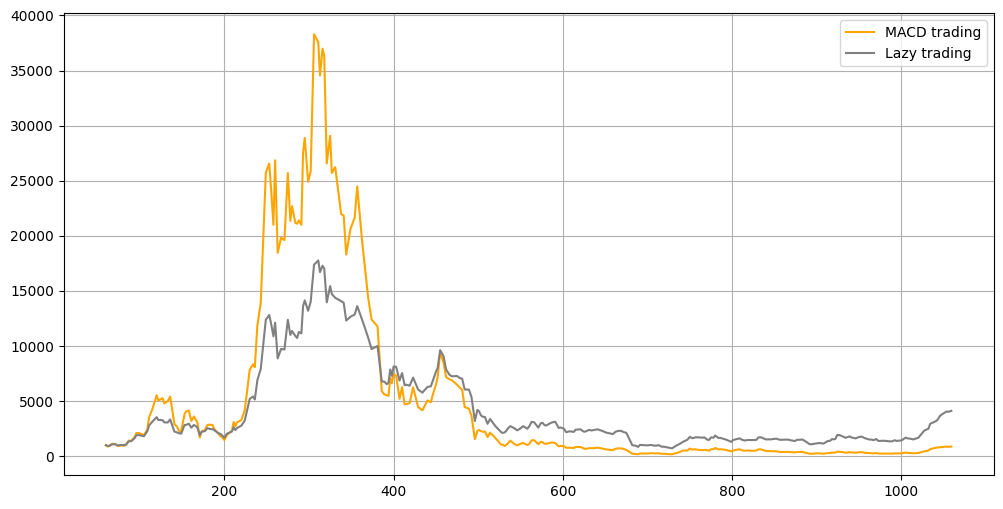

In [101]:
# Was it worth it?

lazy_values_USD = []

for record in records_indexes:
    lazy_values_USD.append(close_data[record] * start_capital_SOL)

profit_over_lazy = [not_lazy - lazy for not_lazy,lazy in zip(usd_history, lazy_values_USD)]

plt.figure(figsize=(12, 6))
plt.plot(records_indexes, usd_history, color='orange', label='MACD trading')   
plt.plot(records_indexes, lazy_values_USD, color='gray', label='Lazy trading')
plt.legend()
plt.grid()

Initial capital (USD): 1000
Finish  capital (USD): 878
Profit (USD): -122
Profit (%): -13
Lazy profit (USD): 3118
Lazy profit (%): 311


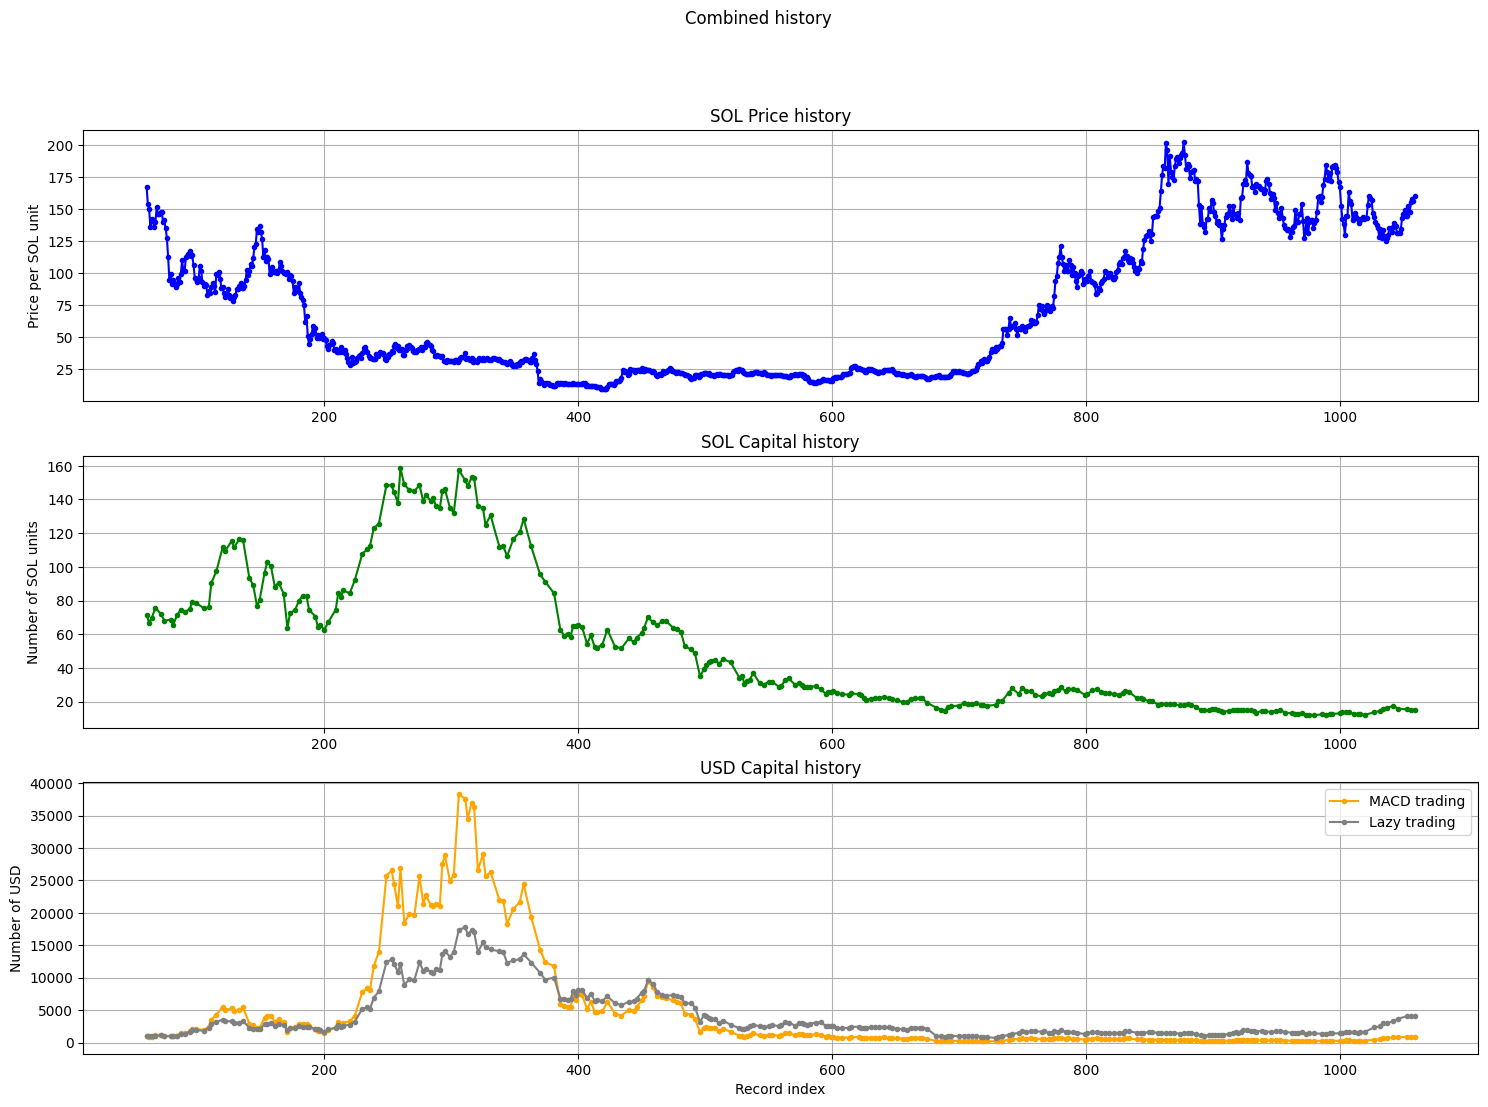

In [102]:
# Final results

plot_combined_history(x_analyzed, close_data, records_indexes, capital_history, usd_history, lazy_values_USD)

start_USD = int(capital_history[0] * close_data[records_indexes[0]])
finish_USD = int(capital_history[-1] * close_data[records_indexes[-1]])
profit_USD = finish_USD - start_USD

print("Initial capital (USD):", start_USD)
print("Finish  capital (USD):", finish_USD)
print("Profit (USD):", profit_USD)
print("Profit (%):", profit_USD * 100 // start_USD)

lazy_finish_USD = int(capital_history[0] * close_data[records_indexes[-1]])
lazy_profit_USD = lazy_finish_USD - start_USD

print("Lazy profit (USD):", lazy_profit_USD)
print("Lazy profit (%):", lazy_profit_USD * 100 // start_USD)